In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"D:\Python USB\HP_LinearRegression\archive\train.csv")


In [4]:
df.shape

(891, 12)

In [5]:
data = pd.read_csv(r"D:\Python USB\HP_LinearRegression\archive\train.csv")

In [6]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [20]:
print(pd.isnull(df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


percentage of female who Survived: 1    233
0     81
Name: Survived, dtype: int64
percentage of male who Survived: 0    468
1    109
Name: Survived, dtype: int64


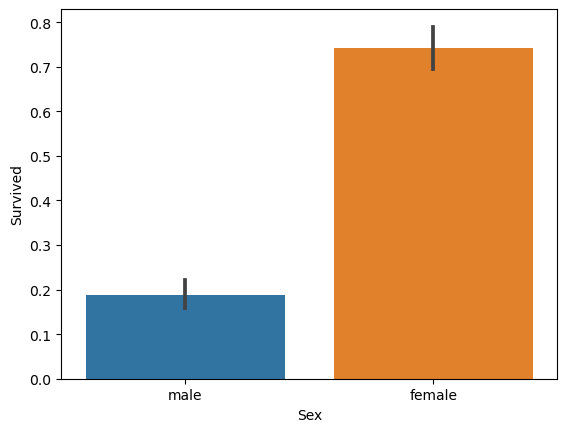

In [7]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex",y="Survived",data=df)
#print percantage of female vs male that survived
print("percentage of female who Survived:", df["Survived"][df["Sex"] == 'female'].value_counts())
print("percentage of male who Survived:", df["Survived"][df["Sex"] == 'male'].value_counts())


percentage of female who Survived: 1    233
0     81
Name: Survived, dtype: int64
percentage of male who Survived: 0    468
1    109
Name: Survived, dtype: int64


Text(0.5, 1.0, 'People survived as per Pclass')

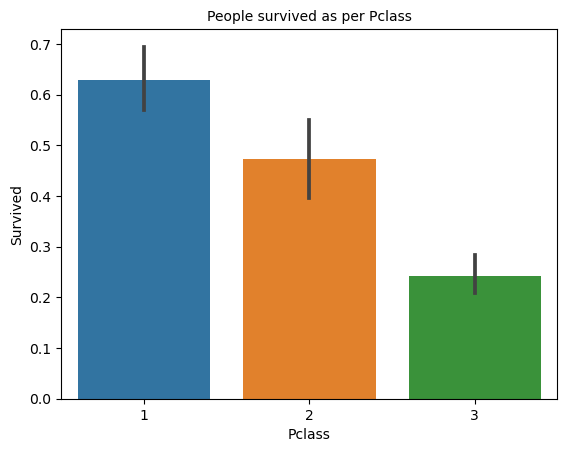

In [8]:
sns.barplot(x="Pclass",y="Survived",data=df)
print("percentage of female who Survived:", df["Survived"][df["Sex"] == 'female'].value_counts())
print("percentage of male who Survived:", df["Survived"][df["Sex"] == 'male'].value_counts())
plt.title('People survived as per Pclass' ,fontsize=10)

In [9]:
data = data.dropna()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [11]:
data = data.drop(['Embarked','Name','Cabin','Ticket'],axis = 1)

In [12]:
data['Sex'] = data['Sex'].map({'male' : 0,'female' : 1})

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Survived'],axis=1),
                                                    data['Survived'], test_size = 0.20,
                                                    random_state = 8)

In [14]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [15]:
predictions = logmodel.predict(X_test)

In [16]:
accuracy = logmodel.score(X_test,y_test)
print(accuracy*100,'%')

81.08108108108108 %


In [17]:
predictions

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[10,  5],
       [ 2, 20]], dtype=int64)